# Problem Statement
The data scientist at BigMart have collected sales data for one thousand five hundred and fifty-nine(1559) products across ten stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales

1. The time of the week - that is weekends as they are usually busier
2. Higher sales according to the time of the day that is, morning and late evening
3. Higher Sales during the end of the year.
4. Store size and location
5. Items with more shelf space sell more

In [129]:
#importing required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [130]:
#getting files in directory
! ls

Big Mart.ipynb    bigmart_train.csv


In [131]:
#Loading files in dataframe
df_bigmart = pd.read_csv('bigmart_train.csv')

In [132]:
#viewing the dataframe
df_bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [133]:
#Getting the shape of the data
df_bigmart.shape

(8523, 12)

In [134]:
#Checking for null values and how much null values we have
df_bigmart.isnull().sum()
#Item_weight and outlet_size has null values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [135]:
#printing the unique values item_fat_content
df_bigmart['Item_Fat_Content'].unique()
#notice that Low Fat is same as low fat and LF and Regular is same as reg. Therefore, we only have 
#2 type of data in this column

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [136]:
#printing the unique values outlet_establishment_year
df_bigmart['Outlet_Establishment_Year'].unique()
#Notice that the year ranges from 1987-2009

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [137]:
#We can calculate outlet age
df_bigmart['Outlet_Age'] = 2020 - df_bigmart['Outlet_Establishment_Year']

In [138]:
#printing unique values of Outlet_size
df_bigmart['Outlet_Size'].unique()
#Notice the nan value, that is missing values in the column

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [139]:
#Using the describe function, we get the descriptive statistics of the dataframe
df_bigmart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,22.168133
std,4.643456,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,11.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,16.000000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,21.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,33.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,35.000000


*Item_Visibility has a min value of 0. This makes no sense because when a product is being sold in store, the visibility cannot be zero.

*Outlet_Establishment_Year vary from 1985 to 2009. The values might not be suitable in this from which is why we earlier converted the values to how olf the particular store is. It should have a netter impact on sales

*The lower account of item_weight and item_outlet_sales confirm the finding from the missing value check

In [140]:
#printing value_counts of Item_Fat_Content and Outlet_Size
df_bigmart['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [141]:
#We will use the mode function to find out the most common value that appears as outlet_size
df_bigmart['Outlet_Size'].mode()[0]

'Medium'

In [142]:
#Replacing missing values of Item_weight and outlet_size with the value medium and the mean of weight
df_bigmart['Outlet_Size'] = df_bigmart['Outlet_Size'].fillna(df_bigmart['Outlet_Size'].mode()[0])
df_bigmart['Item_Weight'] = df_bigmart['Item_Weight'].fillna(df_bigmart['Item_Weight'].mean())

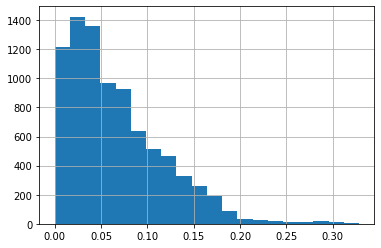

In [143]:
#Plotting histogram to see the distribution of item_visibility column
df_bigmart['Item_Visibility'].hist(bins=20)

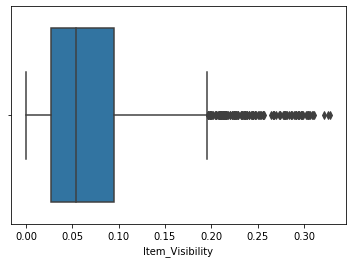

In [144]:
#Checking for outliers using boxplot
import seaborn as sns
sns.boxplot(x=df_bigmart['Item_Visibility'])
#as what the histogram and boxplot shows we have outliers

In [145]:
#removing outliers, we will first get Q1, Q3 and the IQR
Q1 = df_bigmart['Item_Visibility'].quantile(0.25)
Q3 = df_bigmart['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1

In [146]:
#Removing outliers
df = df_bigmart.query('(@Q1 - 1.5*@IQR) <= Item_Visibility <= (@Q3 + 1.5*@IQR)')

In [147]:
#viewing new df
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [148]:
#Getting shape of df and df_bigmart
df.shape, df_bigmart.shape

((8379, 13), (8523, 13))

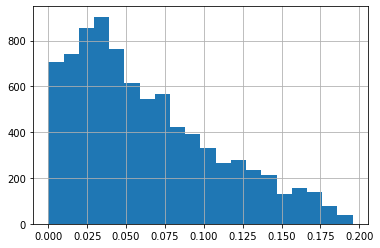

In [149]:
#Checking to see if outliers was removed
df['Item_Visibility'].hist(bins=20)
#Histogram is good, no outliers

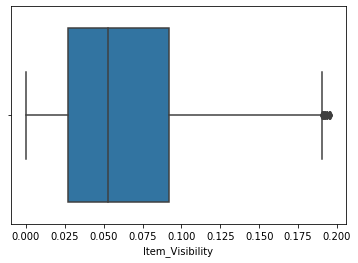

In [150]:
sns.boxplot(x=df['Item_Visibility'])
#Boxplot is good as well

In [151]:
#Updating df_bigmart with df
df_bigmart = df
#Checking for update
df.shape

(8379, 13)

In [152]:
#modifying Item_Visibility by converting the numerical values into categories as 
#low visibility, visibility and high visibility
df_bigmart['Item_Visibility_bins'] = pd.cut(df_bigmart['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], 
                                            labels = ['Low Visible', 'Visible', 'High visible'])

In [153]:
#printing the values of Item_Visibility_bins
df_bigmart['Item_Visibility_bins'].value_counts()

Low Visible     4403
Visible         2557
High visible     893
Name: Item_Visibility_bins, dtype: int64

In [154]:
#Replacing null values with low visibility, regex is because we are replacing with a string value
df_bigmart['Item_Visibility_bins'] = df_bigmart['Item_Visibility_bins'].fillna('Low Visible')

In [155]:
#Remember we found typos and different representation of low fat and regular. lets replace those so they are all the same
df_bigmart['Item_Fat_Content'] = df_bigmart['Item_Fat_Content'].replace(['LF', 'low fat'] , 'Low Fat')
df_bigmart['Item_Fat_Content'] = df_bigmart['Item_Fat_Content'].replace('reg', 'Regular')

In [156]:
#Viewing the updated data
df_bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21,Low Visible
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11,Low Visible
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21,Low Visible
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22,Low Visible
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33,Low Visible


In [157]:
#We will convert all categorical data using LabelEncoder
#Initializing the Encoder
encoder = LabelEncoder()

In [158]:
#Getting the unique fat content
df_bigmart['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [160]:
#Using label encoder on the categorical datas
df_bigmart['Item_Fat_Content'] = encoder.fit_transform(df_bigmart['Item_Fat_Content'])
df_bigmart['Item_Visibility_bins'] = encoder.fit_transform(df_bigmart['Item_Visibility_bins'])
df_bigmart['Outlet_Size'] = encoder.fit_transform(df_bigmart['Outlet_Size'])
df_bigmart['Outlet_Location_Type'] = encoder.fit_transform(df_bigmart['Outlet_Location_Type'])

In [161]:
#creating a dummy variable for item_type
dummy = pd.get_dummies(df_bigmart['Item_Type'])
#Viewing the dummy
dummy.head()

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [162]:
#Concating the data with df_bigmart data
df_bigmart = pd.concat([df_bigmart, dummy], axis = 1)

In [163]:
#Looking at df_bigmart columns datatypes
df_bigmart.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Age                     int64
Item_Visibility_bins           int64
Baking Goods                   uint8
Breads                         uint8
Breakfast                      uint8
Canned                         uint8
Dairy                          uint8
Frozen Foods                   uint8
Fruits and Vegetables          uint8
Hard Drinks                    uint8
Health and Hygiene             uint8
Household                      uint8
Meat                           uint8
Others                         uint8
Seafood                        uint8
S

In [164]:
#We will be using only the relevant columns for model building
df_bigmart = df_bigmart.drop(['Item_Identifier','Item_Type',
                              'Outlet_Type','Outlet_Identifier','Outlet_Establishment_Year'], axis =1)

In [165]:
#viewing the updated data
df_bigmart.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins,Baking Goods,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.30,0,0.016047,249.8092,1,0,3735.1380,21,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,11,1,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,21,1,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,22,1,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,33,1,0,...,0,0,0,1,0,0,0,0,0,0


In [167]:
#Getting the x_features and y_target
x = df_bigmart.drop('Item_Outlet_Sales', axis = 1)
y = df_bigmart.Item_Outlet_Sales

In [168]:
#Initializing linearregression
lm = LinearRegression()

In [169]:
#Fitting the model
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [170]:
#printing the coefficient and intercept
print(lm.intercept_)
print(lm.coef_)

-254.05559585435503
[-2.25184397e+00  5.43055519e+01 -2.69705934e+03  1.57716303e+01
 -7.07082640e+01  1.32283630e+02  1.22801016e+01  8.26335390e+01
 -8.95135990e+00 -1.97861802e+01 -5.70638367e+01  6.15724908e+01
 -5.58638130e+01 -3.29672254e+01  3.67942329e+01  1.77974668e+01
 -4.72340510e+01 -6.20525495e+01 -4.36255036e+01 -1.34977427e+02
  2.49038020e+02 -2.60145578e+00 -2.63254825e+01  1.26246674e+02]


In [171]:
#Lets train and test the model
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [172]:
#Coefficient and intercept of the line
lm.fit(xtrain,ytrain)
print(lm.intercept_)
print(lm.coef_)

-378.5357512762471
[ 9.91300788e-01  4.10916280e+01 -2.78879336e+03  1.59531771e+01
 -4.68641946e+01  1.31325272e+02  1.43605621e+01  9.70270039e+01
 -2.69546402e+01 -8.42768845e+01  1.80824366e+01  5.73711035e+01
 -5.93902648e+01 -2.89570084e+01  3.90702061e-01 -9.00406048e+01
 -4.99636050e+01 -7.84656341e+01 -8.76162050e+01 -8.25593874e+01
  4.04563392e+02  2.87023620e+01  1.56277319e+01  6.34865064e+01]


In [173]:
#lets find out the RMSE for the model
predict = lm.predict(xtest)
#Printing the RMSE
print(sqrt(mean_squared_error(ytest,predict)))
#A good RMSE for this problem is atleast 1150. Using Ridge, Lasso and Elastic Net, 
#We can find out the RMSE and R^2 values

1354.8884897177763


In [174]:
#importing the ridge model from sklearn
from sklearn.linear_model import Ridge
#Initializing the ridge variable with alpha set to .001
ridge = Ridge(alpha = 0.001, normalize = True)

In [181]:
#Fitting the model on xtrain and ytrain
ridge.fit(xtrain,ytrain)
#printing the root mean squared error
print(sqrt(mean_squared_error(ytrain,ridge.predict(xtrain))))
print(sqrt(mean_squared_error(ytest,ridge.predict(xtest))))
#printing the R2 value
print('R2 Value: ', ridge.score(xtest,ytest))

1379.1366314411111
1354.8527911173999
R2 Value:  0.337592076017209


In [182]:
#importing the ridge model from sklearn
from sklearn.linear_model import Lasso
#Initializing the ridge variable with alpha set to .001
lasso = Lasso(alpha = 0.001, normalize = True)

In [183]:
#Fitting the model on xtrain and ytrain
lasso.fit(xtrain,ytrain)
#printing the root mean squared error
print(sqrt(mean_squared_error(ytrain,lasso.predict(xtrain))))
print(sqrt(mean_squared_error(ytest,lasso.predict(xtest))))
#printing the R2 value
print('R2 Value: ', lasso.score(xtest,ytest))

1379.1362950975356
1354.8727266075593
R2 Value:  0.33757258235134346


In [184]:
#importing the ridge model from sklearn
from sklearn.linear_model import ElasticNet
#Initializing the ridge variable with alpha set to .001
elastic = ElasticNet(alpha = 0.001, normalize = True)

In [185]:
#Fitting the model on xtrain and ytrain
elastic.fit(xtrain,ytrain)
#printing the root mean squared error
print(sqrt(mean_squared_error(ytrain,elastic.predict(xtrain))))
print(sqrt(mean_squared_error(ytest,elastic.predict(xtest))))
#printing the R2 value
print('R2 Value: ', elastic.score(xtest,ytest))

1574.9684390133368
1529.3161452094394
R2 Value:  0.1560128289527122
